# Shut the Box

## Step 0: Utils for Jupyter Notebooks

### Add button to Show/Hide code (to focus on outputs)

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show Code"></form>''')

### Add magic command to store python variables in csv file

In [2]:
# credit to sirex, https://github.com/ipython/ipython/issues/6701
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

## Step 1: Generate models

In [3]:
# Edit this cell to define parameters for your model...

boards = 6 # Number of boards to use
sides = 6 # Number of sides per die
die = 1 # Number of die to roll each round
strategy = 1 # Board covering strategy to use (see strategy_lookup in stb/pp_fns.py for more info)

max_score = boards * (boards+1) // 2

In [4]:
%%writetemplate ShutTheBox/stb_params.csv
b, {boards}
d, {sides}
ndie, {die}
strategy, {strategy}

In [28]:
%%writetemplate ShutTheBox/stb_nondet_params.csv
b, {boards}
d, {sides}
ndie, {die}
strategy, 0

In [57]:
!python utils/pyprism.py ShutTheBox/stb.pyprism ShutTheBox/stb6test.prism ShutTheBox/stb_params.csv

Model generated successfully at ShutTheBox\stb6test.prism


In [58]:
!python utils/pyprism.py ShutTheBox/stb.pyprism ShutTheBox/stb6test_nondet.prism ShutTheBox/stb_nondet_params.csv

[(1,)]
[(2,)]
[(3,), (2, 1)]
[(4,), (3, 1)]
[(5,), (4, 1), (3, 2)]
[(6,), (5, 1), (4, 2), (3, 2, 1)]
Model generated successfully at ShutTheBox\stb6test_nondet.prism


In [59]:
# Generate properties file too
!python utils/pyprism.py ShutTheBox/stbprops.pyprism ShutTheBox/stb6test.props ShutTheBox/stb_params.csv

Model generated successfully at ShutTheBox\stb6test.props


## Step 2: Check properties, run experiments, export data

### Does the game eventually always terminate?

In [60]:
!prism ShutTheBox/stb6test.prism ShutTheBox/stb6test.props -prop 1 | grep -E "(Model checking)|(Result)"

Model checking: <<p1>>Pmax=? [ F game_over ]
Result: 0.9999999999999998 (value in the initial state)


### Probability of obtaining each score 

In [61]:
prob_score_file = "ShutTheBox/data/prob_score.csv"

!prism ShutTheBox/stb6test.prism ShutTheBox/stb6.props -prop 2 -const k=1:{max_score} -exportresults {prob_score_file}:csv | grep -E "(Model checking)|(Result)|(Property constants)"

Model checking: <<p1>>Pmin=? [ F game_over&score=k ]
Property constants: k=1
Result: 0.027777777777777776 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&score=k ]
Property constants: k=2
Result: 0.027777777777777776 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&score=k ]
Property constants: k=3
Result: 0.018518518518518517 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&score=k ]
Property constants: k=4
Result: 0.018518518518518517 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&score=k ]
Property constants: k=5
Result: 0.037037037037037035 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&score=k ]
Property constants: k=6
Result: 0.046296296296296294 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&score=k ]
Property constants: k=7
Result: 0.041666666666666664 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&score=k ]
Pr

In [62]:
prob_score_nondet_min_file = "ShutTheBox/data/prob_score_nondet_min.csv"

!prism ShutTheBox/stb6test_nondet.prism ShutTheBox/stb6test.props -prop 2 -const k=1:{max_score} -exportresults {prob_score_nondet_min_file}:csv

PRISM-games

Version: 3.0 (based on PRISM 4.6)
Date: Thu Nov 19 21:44:09 GMT 2020
Hostname: DESKTOP-LDYER
Memory limits: cudd=1g, java(heap)=910.5m
Command line: prism-games ShutTheBox/stb6test_nondet.prism ShutTheBox/stb6test.props -prop 2 -const 'k=1:21' -exportresults 'ShutTheBox/data/prob_score_nondet_min.csv:csv'

Parsing model file "ShutTheBox/stb6test_nondet.prism"...

Type:        CSG
Modules:     player1 board1 board2 board3 board4 board5 board6 
Variables:   state die b1 b2 b3 b4 b5 b6 

Switching to explicit engine, which supports CSGs...

Parsing properties file "ShutTheBox/stb6test.props"...

22 properties:
(1) <<p1>>Pmax=? [ F game_over ]
(2) <<p1>>Pmin=? [ F game_over&score=k ]
(3) <<p1>>Pmax=? [ F game_over&score=k ]
(4) <<p1>>Pmax=? [ F game_over&score=k ]-<<p1>>Pmin=? [ F game_over&score=k ]
(5) <<p1>>Pmin=? [ F game_over&score<=k ]
(6) <<p1>>Pmax=? [ F game_over&score<=k ]
(7) <<p1>>R{"total_boards"}min=? [ F game_over ]
(8) <<p1>>R{"total_boards"}max=? [ F game_over

In [63]:
prob_score_nondet_max_file = "ShutTheBox/data/prob_score_nondet_max.csv"

!prism ShutTheBox/stb6test_nondet.prism ShutTheBox/stb6test.props -prop 3 -const k=1:{max_score} -exportresults {prob_score_nondet_max_file}:csv | grep -E "(Model checking)|(Result)|(Property constants)"

Model checking: <<p1>>Pmax=? [ F game_over&score=k ]
Property constants: k=1
Result: 0.027777777777777776 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score=k ]
Property constants: k=2
Result: 0.027777777777777776 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score=k ]
Property constants: k=3
Result: 0.07407407407407407 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score=k ]
Property constants: k=4
Result: 0.07407407407407407 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score=k ]
Property constants: k=5
Result: 0.09259259259259259 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score=k ]
Property constants: k=6
Result: 0.16666666666666669 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score=k ]
Property constants: k=7
Result: 0.09722222222222224 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score=k ]
Propert

### Expected number of die rolls

In [64]:
!prism ShutTheBox/stb6test.prism ShutTheBox/stb6.props -prop 9 | grep -E "(Model checking)|(Result)"

Model checking: <<p1>>R{"no_rolls"}max=? [ F game_over ]
Result: 4.313786008230452 (value in the initial state)


### Probability of obtaining a score given a particular board is covered

In [65]:
for covered_board in range(1, boards+1):
    !prism ShutTheBox/stb6test.prism ShutTheBox/stb6.props -prop {10+covered_board} -const k=1:{max_score} -exportresults ShutTheBox/data/score_given_{covered_board}.csv:csv | grep -E "(Model checking)|(Result)|(Property constant)|(Exporting results)"
    !echo ========

2727273 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&b1=1&score=k ]/<<p1>>Pmin=? [ F game_over&score=k ]
Property constants: k=11
Result: 0.6923076923076923 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&b1=1&score=k ]/<<p1>>Pmin=? [ F game_over&score=k ]
Property constants: k=12
Result: 0.7073170731707318 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&b1=1&score=k ]/<<p1>>Pmin=? [ F game_over&score=k ]
Property constants: k=13
Result: 0.7692307692307693 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&b1=1&score=k ]/<<p1>>Pmin=? [ F game_over&score=k ]
Property constants: k=14
Result: 0.6842105263157895 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&b1=1&score=k ]/<<p1>>Pmin=? [ F game_over&score=k ]
Property constants: k=15
Result: 0.7741935483870966 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&b1=1&score=k ]/<<p1>>Pmin=? [ F game_ove

### Cumulative probability of a score

In [82]:
cum_prob_file = "ShutTheBox/data/cum_prob.csv"

!prism ShutTheBox/stb6test.prism ShutTheBox/stb6.props -prop 6 -const k=1:{max_score} -exportresults {cum_prob_file}:csv | grep -E "(Model checking)|(Result)|(Property constant)|(Exporting results)"

Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
Property constants: k=1
Result: 0.027777777777777776 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
Property constants: k=2
Result: 0.05555555555555555 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
Property constants: k=3
Result: 0.07407407407407407 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
Property constants: k=4
Result: 0.09259259259259259 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
Property constants: k=5
Result: 0.12962962962962965 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
Property constants: k=6
Result: 0.1759259259259259 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
Property constants: k=7
Result: 0.21759259259259253 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
P

In [83]:
cum_prob_min_file = "ShutTheBox/data/cum_prob_min.csv"

!prism ShutTheBox/stb6test.prism ShutTheBox/stb6.props -prop 5 -const k=1:{max_score} -exportresults {cum_prob_min_file}:csv | grep -E "(Model checking)|(Result)|(Property constant)|(Exporting results)"

Model checking: <<p1>>Pmin=? [ F game_over&score<=k ]
Property constants: k=1
Result: 0.027777777777777776 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&score<=k ]
Property constants: k=2
Result: 0.05555555555555555 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&score<=k ]
Property constants: k=3
Result: 0.07407407407407407 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&score<=k ]
Property constants: k=4
Result: 0.09259259259259259 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&score<=k ]
Property constants: k=5
Result: 0.12962962962962965 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&score<=k ]
Property constants: k=6
Result: 0.1759259259259259 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&score<=k ]
Property constants: k=7
Result: 0.21759259259259253 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&score<=k ]
P

In [84]:
cum_prob_max_file = "ShutTheBox/data/cum_prob_max.csv"

!prism ShutTheBox/stb6test_nondet.prism ShutTheBox/stb6.props -prop 6 -const k=1:{max_score} -exportresults {cum_prob_max_file}:csv | grep -E "(Model checking)|(Result)|(Property constant)|(Exporting results)"

Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
Property constants: k=1
Result: 0.027777777777777776 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
Property constants: k=2
Result: 0.05555555555555555 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
Property constants: k=3
Result: 0.12962962962962962 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
Property constants: k=4
Result: 0.19444444444444445 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
Property constants: k=5
Result: 0.2685185185185185 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
Property constants: k=6
Result: 0.4305555555555554 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
Property constants: k=7
Result: 0.4791666666666666 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
Pro

## Step 3: Visualisations

### Probability of obtaining each score

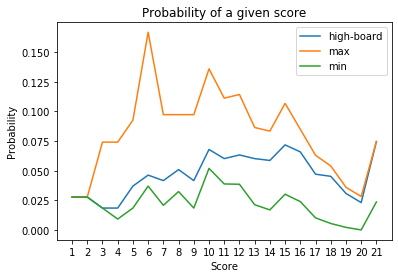

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import csv

def plot(axes, csv_file, series_name, points=None):
    # given a set of axes and a csv filename, reads data from the csv file and plots it on the graph

    data = np.genfromtxt(csv_file, delimiter=',',skip_header=1, names=['x', 'y'])
    ax1.plot(data['x'], data['y'], points, label=series_name)



fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.set_title("Probability of a given score")
ax1.set_xlabel("Score")
ax1.set_ylabel("Probability")

ax1.set_xticks(np.arange(max_score)+1)

plot(ax1, prob_score_file, "high-board")

plot(ax1, prob_score_nondet_max_file, "max")

plot(ax1, prob_score_nondet_min_file, "min")

leg = ax1.legend()

plt.show()

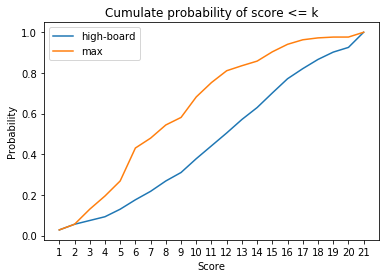

In [88]:
fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.set_title("Cumulate probability of score <= k")
ax1.set_xlabel("Score")
ax1.set_ylabel("Probability")

ax1.set_xticks(np.arange(max_score)+1)

plot(ax1, cum_prob_file, "high-board")

plot(ax1, cum_prob_max_file, "max")

plot(ax1, cum_prob_min_file, "min")

leg = ax1.legend()

plt.show()